This notebook is a personnal study of hypothesis testing within Bayesian framework.

Inspired by this thread:
- https://stats.stackexchange.com/questions/130389/bayesian-equivalent-of-two-sample-t-test

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
print("Setup Complete")

Setup Complete


In [2]:
np.random.seed(7)
print("Prayer to RNGesus Sent")

Prayer to RNGesus Sent


In [3]:
# centering images in the notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Let's consider two sets of samples, and compare their means.
This problem could be further extrapolated to the comparison of the mean score of two models, which is useful for the model selection in Data Science.

In [4]:
#creating samples
sample1 = np.random.normal(loc=100, scale=3, size=8)
sample2 = np.random.normal(loc=103, scale=7, size=10)

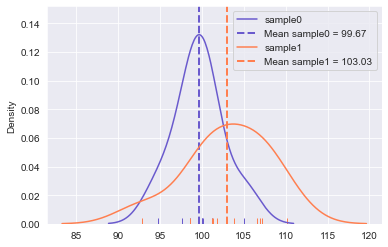

In [5]:
# vizualisation of the samples
col1 = 'slateblue'
col2 = 'coral'
colors=(col1, col2)

fig, ax = plt.subplots()

for i, sample in enumerate([sample1, sample2]):
    col = colors[i]
    lab = f'sample{i}'
    sns.kdeplot(sample, c=col, ax=ax, label=lab)
    sns.rugplot(sample, c=col, ax=ax)
    
    mean = sample.mean()
    ax.axvline(mean, c=col, lw=2, ls='--', label=f'Mean {lab} = {mean:.2f}')
    
ax.legend()
plt.show()

In [6]:
from scipy.stats import norm

def dnorm(x, mu, sig):
    return norm.pdf(x, loc=mu, scale=sig)

def dexp(x, l):
    return l * np.exp(- l*x)

def like(parameters):
    [mu1, sig1, mu2, sig2] = parameters
    return dnorm(sample1, mu1, sig1).prod()*dnorm(sample2, mu2, sig2).prod()

def prior(parameters):
    [mu1, sig1, mu2, sig2] = parameters
    return dnorm(mu1, pooled.mean(), 1000*pooled.std()) * dnorm(mu2, pooled.mean(), 1000*pooled.std()) * dexp(sig1, 0.1) * dexp(sig2, 0.1)

def posterior(parameters):
    [mu1, sig1, mu2, sig2] = parameters
    return like([mu1, sig1, mu2, sig2])*prior([mu1, sig1, mu2, sig2])

In [15]:
mu1 = 100 
sig1 = 10
mu2 = 100
sig2 = 10
parameters = np.array([mu1, sig1, mu2, sig2])

pooled= np.append(sample1, sample2)

niter = 10000

results = np.zeros([niter, 4])
results[1,:] = parameters

from tqdm import tqdm

for iteration in tqdm(np.arange(2,niter)):
    candidate = parameters + np.random.normal(0,0.5,4)
    ratio = posterior(candidate)/posterior(parameters)
    if np.random.uniform() < ratio:
        parameters = candidate
    results[iteration,:] = parameters

#burn-in
results = results[499:niter-1,:]

mu1 = results[:,1]
mu2 = results[:,3]

d = (mu1 - mu2)
p_value = np.mean(d > 0)
print(f"p_value = {p_value}")

100%|█████████████████████████████████████████████████████████████████████████████| 9998/9998 [00:13<00:00, 765.78it/s]

p_value = 0.07673684210526316


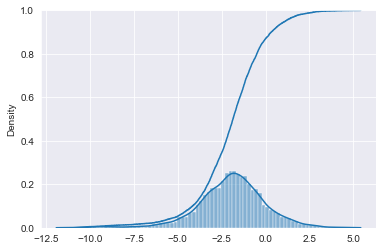

In [12]:
plt.figure(1)
sns.histplot(d, kde=True, stat='density')
sns.ecdfplot(d)
plt.show()

In [19]:
print(f"""
There is {p_value*100:.2f}% chances that the mean of the sample1 is higher than the mean of the samples2.
""")


There is 7.67% chances that the mean of the sample1 is higher than the mean of the samples2.



In [20]:
results.mean(axis=0)

array([ 99.51002948,   3.40635756, 103.28860518,   5.64400906])